# Project

In [22]:
import pandas as pd
import numpy as np

# Reading dataset
london_data = pd.read_csv('london_merged.csv')
london_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### london_data Information

In [23]:
london_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [24]:
london_data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


### Checking Null values

In [25]:
london_data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Observations: No Null values found in the dataset

### Datatypes

In [26]:
london_data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Observations : timestamp is object, Have to change it to datetime datatype

### Feature Engineering

In [27]:
london_data["timestamp"] = pd.to_datetime(london_data["timestamp"])

In [28]:
london_data["month"] = london_data["timestamp"].apply(lambda x:x.month)

london_data["day"] = london_data["timestamp"].apply(lambda x:x.day)

london_data["hour"] = london_data["timestamp"].apply(lambda x:x.hour)

In [29]:
london_data = london_data.drop("timestamp", axis=1) 
london_data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4


Changing the data type of 'timestamp' column by adding the new columns such as month,day and hour according to the timestamp data

### One Hot Encoding

In [30]:
dum_data = pd.get_dummies(london_data["weather_code"], prefix="weather")
london_data = pd.concat([london_data,dum_data], axis=1)
london_data = london_data.drop("weather_code", axis=1)

In [31]:
dum_data = pd.get_dummies(london_data["season"], prefix="season")
london_data = pd.concat([london_data,dum_data], axis=1)
londin_data = london_data.drop("season", axis=1)

We must handle weather_code and season as categorical variables by utilizing One Hot Encoding to convert them to numerical values.

In [32]:
n_columns = ['t1', 't2', 'hum', 'wind_speed','day','hour','month']
london_data[n_columns + ['cnt']].describe()

,t1,t2,hum,wind_speed,day,hour,month,cnt
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,12.468091,11.520836,72.324954,15.913063,15.751981,11.513265,6.514643,1143.101642
std,5.571818,6.615145,14.313186,7.894570,8.793704,6.915893,3.452509,1085.108068
min,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,6.000000,63.000000,10.000000,8.000000,6.000000,4.000000,257.000000
50%,12.500000,12.500000,74.500000,15.000000,16.000000,12.000000,7.000000,844.000000
75%,16.000000,16.000000,83.000000,20.500000,23.000000,18.000000,10.000000,1671.750000
max,34.000000,34.000000,100.000000,56.500000,31.000000,23.000000,12.000000,7860.000000


array([[<AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'t1'}>,
        <AxesSubplot:title={'center':'t2'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'is_holiday'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'weather_1.0'}>,
        <AxesSubplot:title={'center':'weather_2.0'}>,
        <AxesSubplot:title={'center':'weather_3.0'}>,
        <AxesSubplot:title={'center':'weather_4.0'}>],
       [<AxesSubplot:title={'center':'weather_7.0'}>,
        <AxesSubplot:title={'center':'weather_10.0'}>,
        <AxesSubplot:title={'center':'weather_26.0'}>,
        <AxesSubplot:title={'center':'season_0.0'}>,
        <AxesSubplot:title={'cent

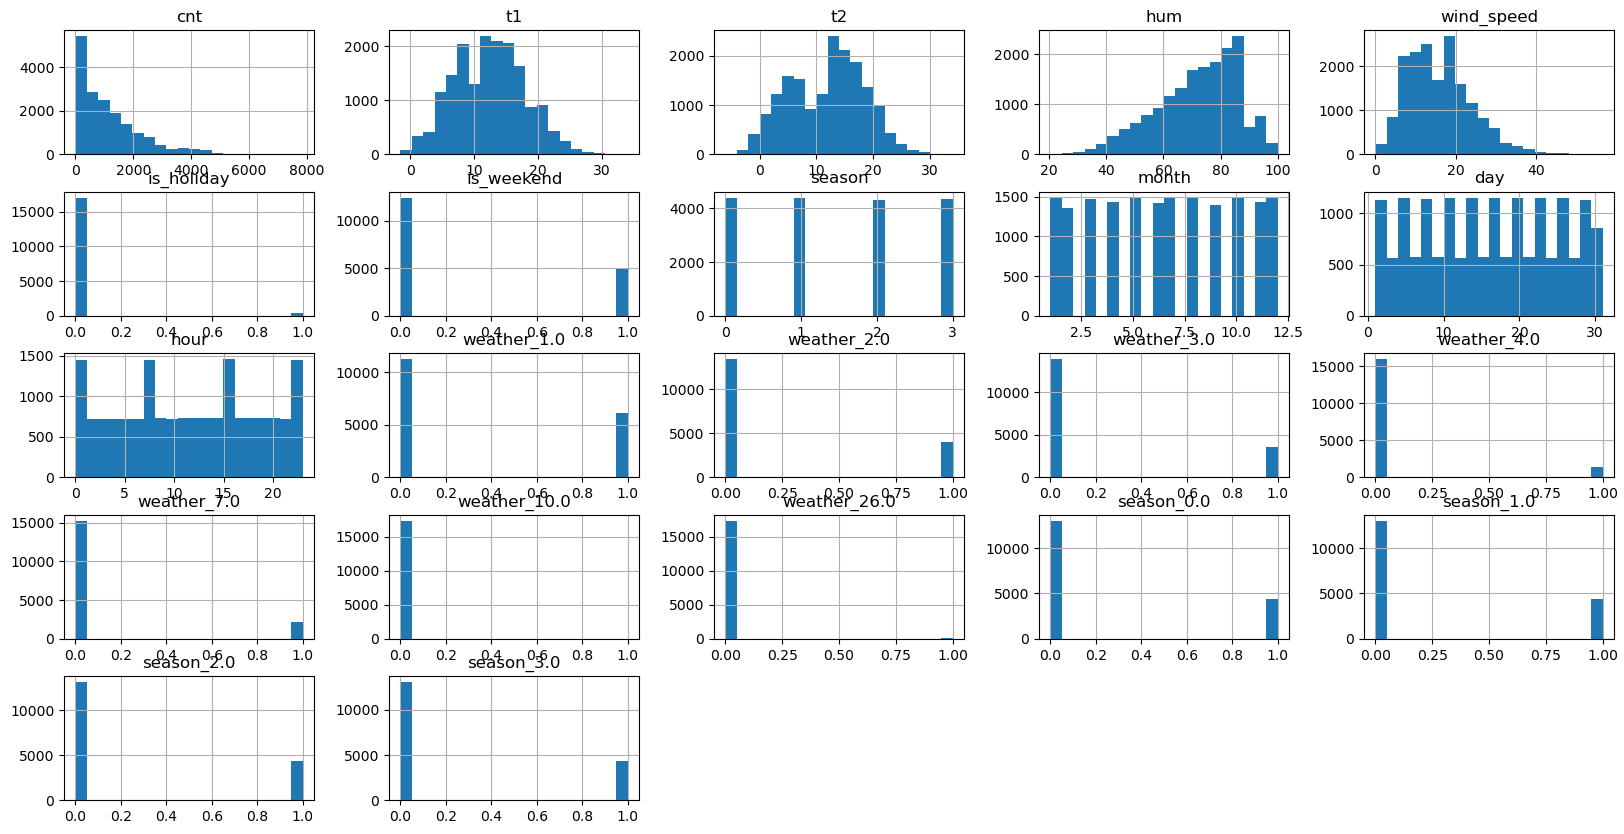

In [33]:
london_data.hist(bins=20,figsize =(20,10))

### Linear Regression Model

In [110]:
X = london_data.drop("cnt", axis=1)
y = london_data["cnt"]

Defining X and y. In X variable dropping the 'cnt' column and in y varible only 'cnt' column

In [111]:
print(X)

        t1   t2    hum  wind_speed  is_holiday  is_weekend  season  month  \
0      3.0  2.0   93.0         6.0         0.0         1.0     3.0      1   
1      3.0  2.5   93.0         5.0         0.0         1.0     3.0      1   
2      2.5  2.5   96.5         0.0         0.0         1.0     3.0      1   
3      2.0  2.0  100.0         0.0         0.0         1.0     3.0      1   
4      2.0  0.0   93.0         6.5         0.0         1.0     3.0      1   
...    ...  ...    ...         ...         ...         ...     ...    ...   
17409  5.0  1.0   81.0        19.0         0.0         0.0     3.0      1   
17410  5.0  1.0   81.0        21.0         0.0         0.0     3.0      1   
17411  5.5  1.5   78.5        24.0         0.0         0.0     3.0      1   
17412  5.5  1.5   76.0        23.0         0.0         0.0     3.0      1   
17413  5.0  1.0   76.0        22.0         0.0         0.0     3.0      1   

       day  hour  ...  weather_2.0  weather_3.0  weather_4.0  weather_7.0  

In [36]:
print(y)

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 17414, dtype: int64


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

spliting the data into 80% for training and 20% for testing

In [194]:
print("size of Traning data set:",X_train.shape[0])
print("size of testing data set:",X_test.shape[0] )

size of Traning data set: 13931
size of testing data set: 3483


In [114]:
from sklearn.linear_model import LinearRegression
mod_lin = LinearRegression()
mod_lin.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = mod_lin.predict(X_test)
print(y_pred)

[1159.37037463 1841.37088785  962.86220776 ... 1118.54459289 1566.89827345
  686.23158512]


In [120]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)*100
print("R2:",r2)
mse = mean_squared_error(y_test,y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 31.944661704384913
MSE: 814512.2659879726
RMSE: 902.5033329511713


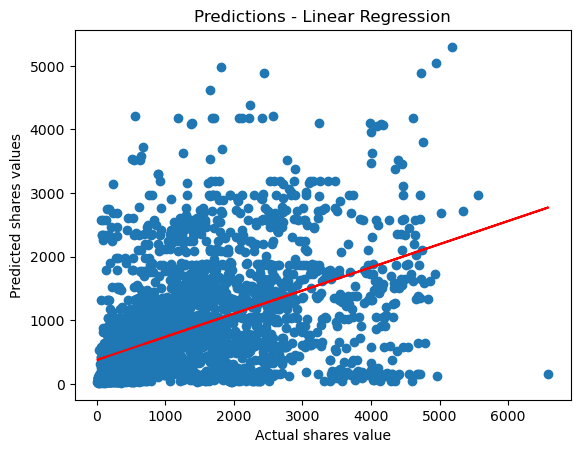

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred)
plt.xlabel('Actual shares value')
plt.ylabel('Predicted shares values')
plt.title('Predictions - Linear Regression')
z = np.polyfit(y_test,y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='Red')
plt.show()

# RandomForestRegressor 

In [154]:
X = london_data.drop("cnt", axis=1)
y = london_data["cnt"]

In [155]:
print(X)

        t1   t2    hum  wind_speed  is_holiday  is_weekend  season  month  \
0      3.0  2.0   93.0         6.0         0.0         1.0     3.0      1   
1      3.0  2.5   93.0         5.0         0.0         1.0     3.0      1   
2      2.5  2.5   96.5         0.0         0.0         1.0     3.0      1   
3      2.0  2.0  100.0         0.0         0.0         1.0     3.0      1   
4      2.0  0.0   93.0         6.5         0.0         1.0     3.0      1   
...    ...  ...    ...         ...         ...         ...     ...    ...   
17409  5.0  1.0   81.0        19.0         0.0         0.0     3.0      1   
17410  5.0  1.0   81.0        21.0         0.0         0.0     3.0      1   
17411  5.5  1.5   78.5        24.0         0.0         0.0     3.0      1   
17412  5.5  1.5   76.0        23.0         0.0         0.0     3.0      1   
17413  5.0  1.0   76.0        22.0         0.0         0.0     3.0      1   

       day  hour  ...  weather_2.0  weather_3.0  weather_4.0  weather_7.0  

In [156]:
print(y)

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 17414, dtype: int64


In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
print("size of Traning data set:",X_train.shape[0])
print("size of testing data set:",X_test.shape[0] )

size of Traning data set: 13931
size of testing data set: 3483


In [159]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [160]:
y_pred = model_rf.predict(X_test)
print(y_pred)

[ 575.26  873.14  513.99 ...  298.9  4430.58  131.17]


In [163]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)*100
print("R2:",r2)
mse = mean_squared_error(y_test,y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 95.38913702657025
MSE: 55184.56806922193
RMSE: 234.91395886413804


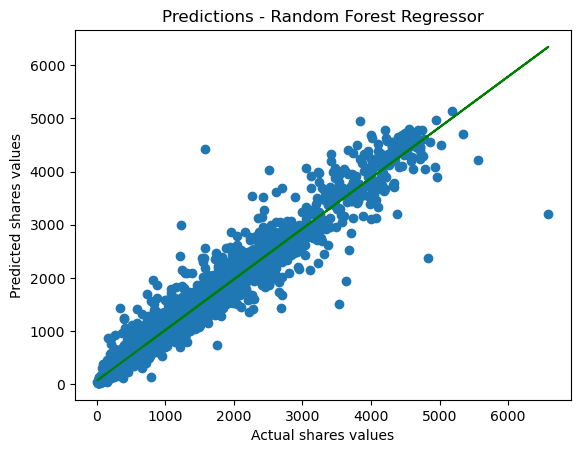

In [165]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual shares values')
plt.ylabel('Predicted shares values')
plt.title('Predictions - Random Forest Regressor')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='green')
plt.show()

# Decision Tree

In [166]:
X = london_data.drop("cnt", axis=1)
y = london_data["cnt"]

In [167]:
print(X)

        t1   t2    hum  wind_speed  is_holiday  is_weekend  season  month  \
0      3.0  2.0   93.0         6.0         0.0         1.0     3.0      1   
1      3.0  2.5   93.0         5.0         0.0         1.0     3.0      1   
2      2.5  2.5   96.5         0.0         0.0         1.0     3.0      1   
3      2.0  2.0  100.0         0.0         0.0         1.0     3.0      1   
4      2.0  0.0   93.0         6.5         0.0         1.0     3.0      1   
...    ...  ...    ...         ...         ...         ...     ...    ...   
17409  5.0  1.0   81.0        19.0         0.0         0.0     3.0      1   
17410  5.0  1.0   81.0        21.0         0.0         0.0     3.0      1   
17411  5.5  1.5   78.5        24.0         0.0         0.0     3.0      1   
17412  5.5  1.5   76.0        23.0         0.0         0.0     3.0      1   
17413  5.0  1.0   76.0        22.0         0.0         0.0     3.0      1   

       day  hour  ...  weather_2.0  weather_3.0  weather_4.0  weather_7.0  

In [168]:
print(y)

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 17414, dtype: int64


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [196]:
print("size of Traning data set:",X_train.shape[0])
print("size of testing data set:",X_test.shape[0] )

size of Traning data set: 13931
size of testing data set: 3483


In [171]:
from sklearn.tree import DecisionTreeRegressor

mod_dec = DecisionTreeRegressor().fit(X_train, y_train)

In [172]:
y_pred = mod_dec.predict(X_test)
print(y_pred)

[ 758. 1118.  647. ...  309. 4614.   78.]


In [174]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)*100
print("R2:",r2)
mse = mean_squared_error(y_test,y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 91.69990555452718
MSE: 99338.69853574505
RMSE: 315.1804221961527


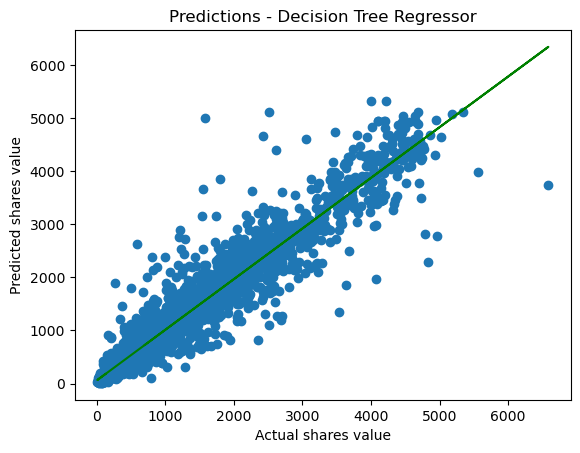

In [176]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual shares value')
plt.ylabel('Predicted shares value')
plt.title('Predictions - Decision Tree Regressor')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='green')
plt.show()